**# Data cleaning**

In [16]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 1. UNIVERSAL PATHING
# Adjust 'project_dataset' to your local folder name if different
data_folder = "project_dataset"
cash_path = os.path.join(data_folder, "extract - cash request - data analyst.csv")
fees_path = os.path.join(data_folder, "extract - fees - data analyst - .csv")

# 2. LOADING DATA
cash_request = pd.read_csv(cash_path)
fees = pd.read_csv(fees_path)

# 3. DATE CLEANING (Merged logic)
# Combining all date columns identified by the team
cash_date_cols = ["created_at", "updated_at", "moderated_at", "reimbursement_date", 
                  "cash_request_received_date", "money_back_date", "send_at", 
                  "reco_creation", "reco_last_update"]

fees_date_cols = ["created_at", "updated_at", "paid_at", "from_date", "to_date"]

# Apply conversion to cash_request
for col in cash_date_cols:
    if col in cash_request.columns:
        cash_request[col] = pd.to_datetime(cash_request[col], errors='coerce')

# Apply conversion to fees
for col in fees_date_cols:
    if col in fees.columns:
        fees[col] = pd.to_datetime(fees[col], errors='coerce')

# 4. DATA INTEGRITY FIXES
# Ensure IDs are integers for proper merging later
fees["cash_request_id"] = fees["cash_request_id"].astype("Int64")
cash_request["user_id"] = cash_request["user_id"].astype("Int64")

print("✅ System Ready: Data loaded, dates converted, and IDs formatted.")



✅ System Ready: Data loaded, dates converted, and IDs formatted.


0
0
These columns were dropped: []


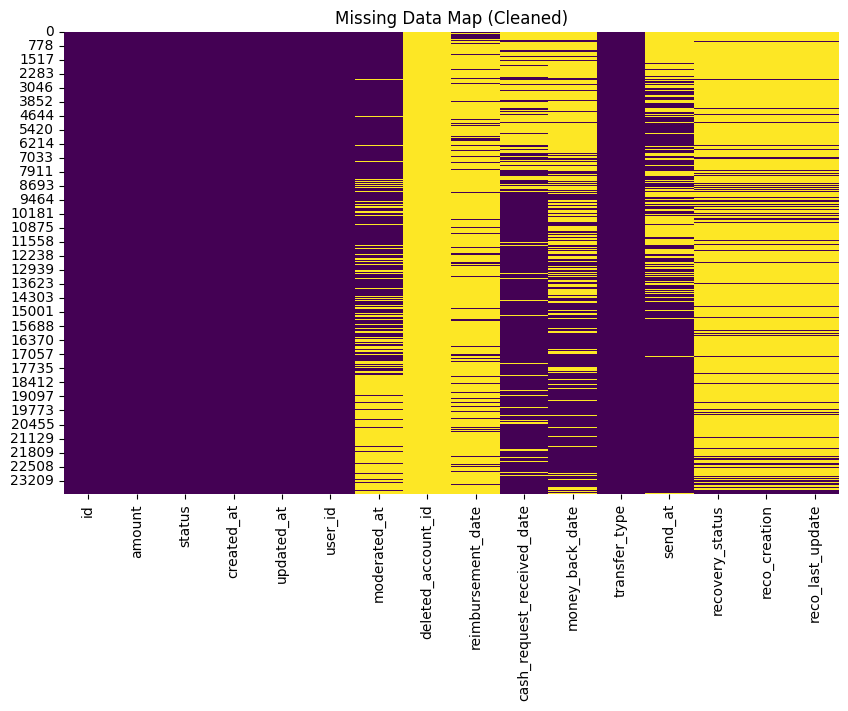

In [17]:
#Remove Duplicate
cash_request = cash_request.drop_duplicates()
fees = fees.drop_duplicates()

# Remove impossible negative amounts
fees = fees[fees["total_amount"] >= 0]

# Remove fees without a cash_request_id
fees = fees[fees["cash_request_id"].notna()]

#Identify and drop completely emppty columns
cash_request = cash_request.dropna(subset=["created_at"])
print(cash_request["created_at"].isna().sum())
cash_request = cash_request.dropna(subset=["user_id"])
print(cash_request["user_id"].isna().sum())
empty_cols = cash_request.columns[cash_request.isnull().all()]
cash_request = cash_request.drop(columns=empty_cols)

print(f"These columns were dropped: {list(empty_cols)}")

#Take a look at the remaining missing data 
plt.figure(figsize=(10, 6))
sns.heatmap(cash_request.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Map (Cleaned)')
plt.show()



In [18]:
Project Status & Next Steps
Current Progress:

Initial data cleaning is complete; completely empty columns have been dropped.

Date columns have been converted to datetime objects.

Preliminary cohorts have been defined using the first created_at month per user.

Note: We have 14 unique cohorts, including a NaT group that needs investigation for data quality reporting.

Next Steps for the Team:

Revenue Integration: Merge the fees data into the cash_request_cleaned dataframe. We need to group fees by cash_request_id and sum the total_amount first to avoid duplicating rows during the merge.

Incident Rate Calculation: Identify "incidents" within the fees table (look for type == 'incident' or specific status flags) to calculate the Incident Rate per cohort.

Retention/Frequency Matrix: Create a pivot table showing the number of active users in each cohort over the subsequent months to calculate the Frequency of Service Usage.

Data Quality Report: Document why we have NaT values and how many users are affected to fulfill the Data Quality Analysis requirement.

SyntaxError: invalid syntax (2676748378.py, line 1)

In [ ]:
#Cohort Creation

#First Cash request per User
cash_request["cohort_month"] = (cash_request.groupby("user_id")["created_at"].transform(min).dt.to_period("M"))

#Activity month(month of each request)
cash_request["request_month"] = cash_request["created_at"].dt.to_period("M")

cash_request.head()


C:\Users\swapr\AppData\Local\Temp\ipykernel_36564\1189478578.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request["cohort_month"] = (cash_request.groupby("user_id")["created_at"].transform(min).dt.to_period("M"))
C:\Users\swapr\AppData\Local\Temp\ipykernel_36564\1189478578.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request["request_month"] = cash_request["created_at"].dt.to_period("M")


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort_month,request_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804,2019-12-11 16:47:42.405646+00:00,NaN,2020-01-09 19:05:21.596363+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231,2019-12-11 14:24:22.897988+00:00,NaN,2020-01-09 19:50:12.347780+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191,2019-12-11 09:46:59.777728+00:00,NaN,2020-01-09 19:13:35.825041+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761,2019-12-18 14:26:18.128407+00:00,NaN,2020-01-09 19:16:10.879606+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686,2020-05-07 09:21:55.320193+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05,2020-05


In [ ]:
#Frequency of service usage
frequency_usage = (
    cash_request.groupby(["cohort_month", "request_month"])
      .agg(request_count=("id", "count"))
      .reset_index()
)


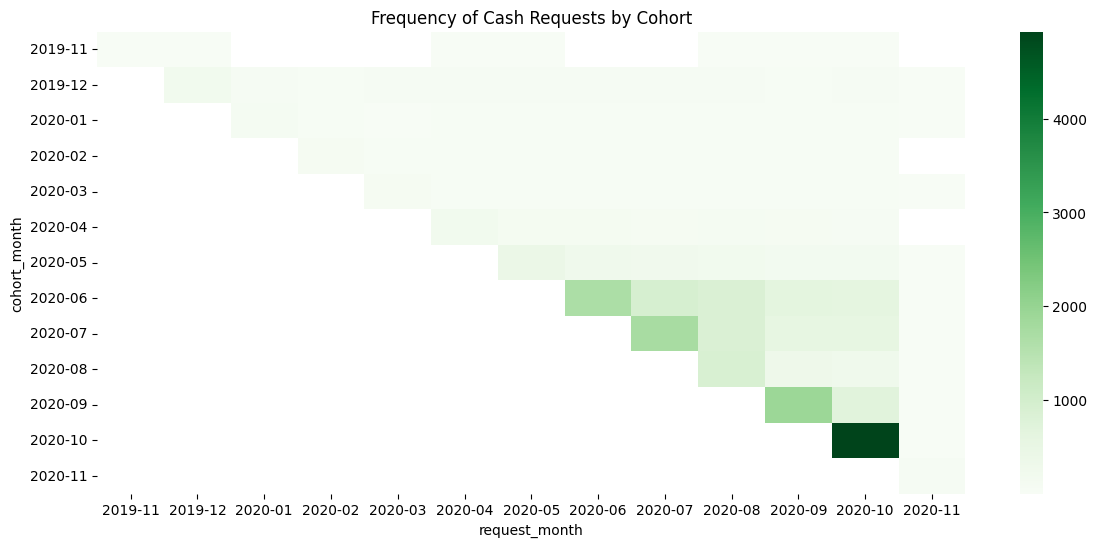

In [ ]:
#Rows = Cohort months:Each row is a group of users who made their first cash request in that month
#Columns = Request months:These are the calendar months when users made cash requests.
#Cells = Number of cash requests (request_count)
#Color bar on the right Shows the scale of request_count (from 0 up to ~4000).


freq_pivot = frequency_usage.pivot(index="cohort_month", columns="request_month", values="request_count")
plt.figure(figsize=(14,6))
sns.heatmap(freq_pivot, cmap="Greens", annot=False)
plt.title("Frequency of Cash Requests by Cohort")
plt.show()


In [ ]:
#Incident Rate
#Filter incident fees
incident_fees = fees[fees["type"] == "incident"]
incident_fees["fee_month"] = incident_fees["created_at"].dt.to_period("M")

C:\Users\swapr\AppData\Local\Temp\ipykernel_36564\1159155404.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incident_fees["fee_month"] = incident_fees["created_at"].dt.to_period("M")


In [ ]:
#Join with Cash request to get cohort
incident = incident_fees.merge(
    cash_request[["id", "user_id", "cohort_month"]],
    left_on="cash_request_id",
    right_on="id",
    how="left"
)


In [ ]:
#Compute incident count
incident_rate = (
    incident.groupby(["cohort_month", "fee_month"])
            .agg(incident_count=("id_x", "count"))
            .reset_index()
)


In [ ]:
#Merge with request frequency_usage
incident_rate = incident_rate.merge(
    frequency_usage,
    left_on=["cohort_month", "fee_month"],
    right_on=["cohort_month", "request_month"],
    how="left"
)

incident_rate["incident_rate"] = incident_rate["incident_count"] / incident_rate["request_count"]
incident_rate

,cohort_month,fee_month,incident_count,request_month,request_count,incident_rate
0,2019-12,2020-07,16,2020-07,63,0.253968
1,2019-12,2020-08,6,2020-08,76,0.078947
2,2019-12,2020-09,11,2020-09,50,0.220000
3,2019-12,2020-10,9,2020-10,71,0.126761
4,2020-01,2020-06,1,2020-06,25,0.040000
5,2020-01,2020-07,2,2020-07,28,0.071429
6,2020-01,2020-08,6,2020-08,22,0.272727
7,2020-01,2020-09,6,2020-09,22,0.272727
8,2020-01,2020-10,6,2020-10,24,0.250000
9,2020-02,2020-07,3,2020-07,37,0.081081


In [19]:
# First cash request date per user
user_first = (
    cash_request.groupby("user_id", as_index=False)["created_at"]
    .min()
    .rename(columns={"created_at": "first_cash_request_at"})
)
# Cohort = month of first request
user_first["cohort"] = user_first["first_cash_request_at"].dt.to_period("M")
user_first.head()

C:\Users\swapr\AppData\Local\Temp\ipykernel_41044\3611460919.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  user_first["cohort"] = user_first["first_cash_request_at"].dt.to_period("M")


,user_id,first_cash_request_at,cohort
0,34,2020-04-20 15:50:21.187257+00:00,2020-04
1,35,2019-12-13 20:27:38.106778+00:00,2019-12
2,47,2019-11-19 13:57:53.511561+00:00,2019-11
3,52,2019-12-17 09:01:12.584634+00:00,2019-12
4,53,2019-12-21 11:39:03.844436+00:00,2019-12


In [20]:
fees_paid = fees[fees["paid_at"].notna()].copy()
# If total_amount is text, ensure numeric
fees_paid["total_amount"] = pd.to_numeric(fees_paid["total_amount"], errors="coerce").fillna(0)
fees_paid.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,NaT,NaT,after
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,NaT,NaT,after


In [21]:
df = fees_paid.merge(
    cash_request[["id", "user_id", "created_at"]],
    left_on="cash_request_id",
    right_on="id",
    how="left",
    suffixes=("_fee", "_cash")
)
# Add cohort info
df = df.merge(
    user_first[["user_id", "cohort"]],
    on="user_id",
    how="left"
)
df.head()

,id_fee,cash_request_id,type,status,category,total_amount,reason,created_at_fee,updated_at,paid_at,from_date,to_date,charge_moment,id_cash,user_id,created_at_cash,cohort
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after,14941.0,35661,2020-09-07 10:46:57.780263+00:00,2020-09
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after,11714.0,16158,2020-08-10 13:15:54.291488+00:00,2020-06
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after,23371.0,81575,2020-10-23 10:10:43.278601+00:00,2020-10
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,NaT,NaT,after,26772.0,94393,2020-10-31 15:46:14.156730+00:00,2020-10
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,NaT,NaT,after,NaN,<NA>,NaT,NaT


In [22]:
df = df.dropna(subset=["paid_at", "cohort"])
# Ensure correct types
df["cohort"] = df["cohort"].astype("period[M]")
df["revenue_month"] = df["paid_at"].dt.to_period("M")
# Calculate months since cohort safely
df["cohort_month"] = (df["revenue_month"] - df["cohort"]).apply(lambda x: x.n)
# Keep valid timeline only
df = df[df["cohort_month"] >= 0]

C:\Users\swapr\AppData\Local\Temp\ipykernel_41044\1802913357.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["revenue_month"] = df["paid_at"].dt.to_period("M")


In [23]:
df[["user_id", "cohort", "paid_at", "revenue_month", "cohort_month", "total_amount"]].head()

,user_id,cohort,paid_at,revenue_month,cohort_month,total_amount
0,35661,2020-09,2020-12-17 14:50:07.470110+00:00,2020-12,3,5.0
1,16158,2020-06,2020-12-08 17:13:10.459080+00:00,2020-12,6,5.0
2,81575,2020-10,2020-11-04 19:34:37.432910+00:00,2020-11,1,5.0
3,94393,2020-10,2020-11-19 05:09:22.500223+00:00,2020-11,1,5.0
5,90386,2020-10,2020-11-09 19:10:14.474070+00:00,2020-11,1,5.0


In [24]:
cohort_revenue = (
    df.groupby(["cohort", "cohort_month"], as_index=False)["total_amount"]
    .sum()
    .rename(columns={"total_amount": "revenue"})
)
cohort_revenue.head()

,cohort,cohort_month,revenue
0,2019-11,8,5.0
1,2019-11,10,5.0
2,2019-11,11,10.0
3,2019-11,12,5.0
4,2019-12,6,10.0


In [25]:
cohort_matrix = cohort_revenue.pivot_table(
    index="cohort",
    columns="cohort_month",
    values="revenue",
    aggfunc="sum",
    fill_value=0
).sort_index()
cohort_matrix

cohort_month,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2019-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,10.0,5.0
2019-12,0.0,0.0,0.0,0.0,0.0,0.0,10.0,55.0,130.0,210.0,295.0,245.0,55.0
2020-01,0.0,0.0,0.0,0.0,0.0,10.0,55.0,45.0,90.0,145.0,70.0,40.0,35.0
2020-02,0.0,0.0,0.0,0.0,20.0,30.0,45.0,125.0,210.0,170.0,10.0,0.0,5.0
2020-03,0.0,0.0,0.0,20.0,55.0,40.0,105.0,175.0,140.0,20.0,5.0,5.0,0.0
2020-04,0.0,0.0,45.0,125.0,115.0,310.0,470.0,260.0,225.0,20.0,0.0,0.0,0.0
2020-05,0.0,95.0,360.0,340.0,655.0,1005.0,600.0,255.0,75.0,20.0,0.0,0.0,0.0
2020-06,430.0,1265.0,1070.0,2700.0,3930.0,2600.0,1080.0,285.0,110.0,0.0,0.0,0.0,0.0
2020-07,695.0,1080.0,2370.0,3545.0,2330.0,855.0,215.0,140.0,0.0,0.0,0.0,0.0,0.0


In [28]:
cohort_matrix.style.format("{:,.2f}")

AttributeError: The '.style' accessor requires jinja2